In [135]:
import pandas as pd
data = pd.read_excel('dataset.xlsx')
data.head(5)

,Unnamed: 0,Heavy / Extreme menstrual bleeding,Menstrual pain (Dysmenorrhea),Painful / Burning pain during sex (Dyspareunia),Pelvic pain,Irregular / Missed periods,Cramping,Abdominal pain / pressure,Back pain,Painful bowel movements,...,Hormonal problems,Bloating,Feeling sick,Decreased energy / Exhaustion,Abdominal Cramps during Intercourse,Insomnia / Sleeplessness,Acne / pimples,Loss of appetite,row,label
0,Heavy / Extreme menstrual bleeding;Fatigue / C...,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,0,0,1
1,Heavy / Extreme menstrual bleeding;Nausea;Pain...,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,0,1,1,1
2,Fatigue / Chronic fatigue;Nausea;Bloating;Back...,0,1,0,1,1,1,0,1,0,...,0,1,1,1,0,1,0,0,2,1
3,Heavy / Extreme menstrual bleeding;Fatigue / C...,1,0,0,0,0,1,1,1,0,...,0,1,0,1,0,0,0,0,3,1
4,Fatigue / Chronic fatigue;Painful / Burning pa...,0,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,4,1


In [136]:
data['Endometriosis'] = data['label']
data.columns

Index(['Unnamed: 0', 'Heavy / Extreme menstrual bleeding',
       'Menstrual pain (Dysmenorrhea)',
       'Painful / Burning pain during sex (Dyspareunia)', 'Pelvic pain',
       'Irregular / Missed periods', 'Cramping', 'Abdominal pain / pressure',
       'Back pain', 'Painful bowel movements', 'Nausea', 'Menstrual clots',
       'Infertility', 'Painful cramps during period', 'Pain / Chronic pain',
       'Diarrhea', 'Long menstruation', 'Constipation / Chronic constipation',
       'Vomiting / constant vomiting', 'Fatigue / Chronic fatigue',
       'Painful ovulation', 'Stomach cramping', 'Migraines',
       'Extreme / Severe pain', 'Leg pain', 'Irritable Bowel Syndrome (IBS)',
       'Syncope (fainting, passing out)', 'Mood swings', 'Depression',
       'Bleeding', 'Lower back pain', 'Fertility Issues', 'Ovarian cysts',
       'Painful urination', 'Headaches', 'Constant bleeding',
       'Pain after Intercourse', 'Digestive / GI problems',
       'IBS-like symptoms', 'Excessive blee

In [117]:
data.dtypes

Unnamed: 0                                         object
Heavy / Extreme menstrual bleeding                  int64
Menstrual pain (Dysmenorrhea)                       int64
Painful / Burning pain during sex (Dyspareunia)     int64
Pelvic pain                                         int64
                                                    ...  
Acne / pimples                                      int64
Loss of appetite                                    int64
row                                                 int64
label                                               int64
Endometriosis                                       int64
Length: 62, dtype: object

In [137]:
data.drop(columns=['Unnamed: 0','label', 'row'], axis=1, inplace=True)

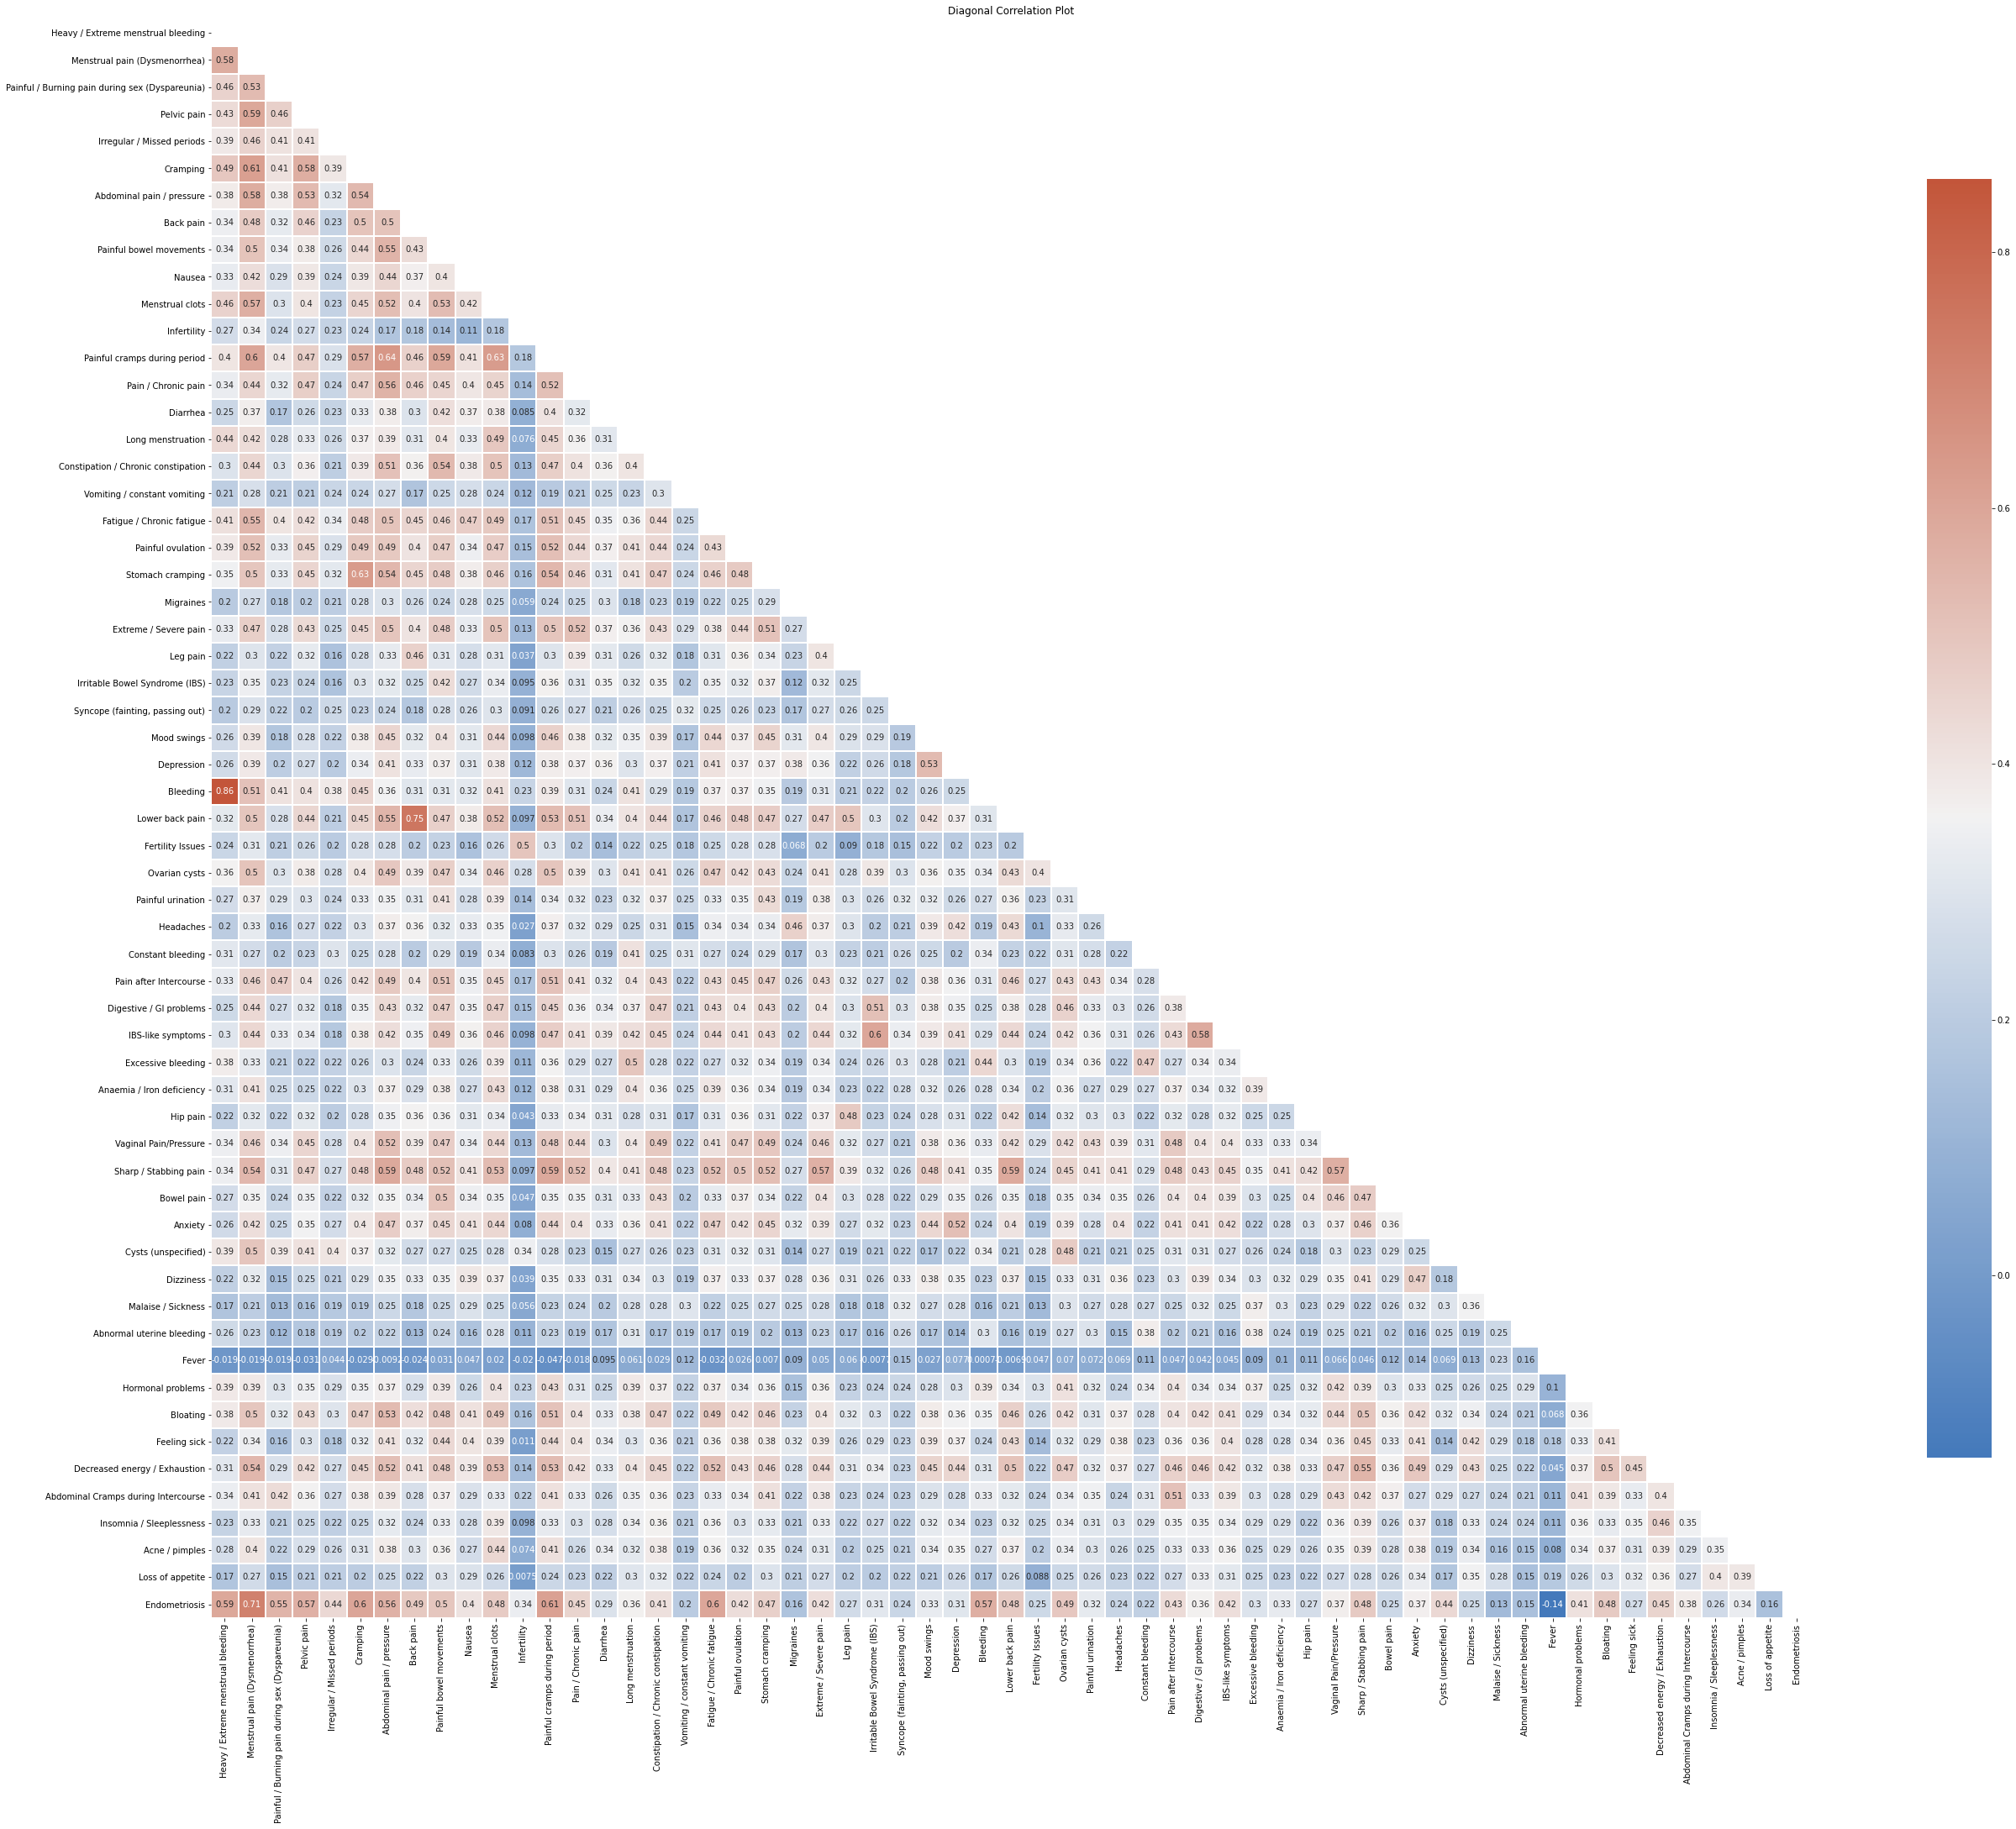

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(50,35))
corr = data.corr(method='pearson')
mask = np.triu(np.ones_like(corr))
plt.title('Diagonal Correlation Plot')
sns.heatmap(corr, 
            mask=mask, 
            annot=True, 
            cmap=sns.diverging_palette(250, 20, as_cmap=True),   
            square = True,                                 
            linewidths = 1.5,
            cbar_kws = {"shrink": .8});

In [138]:
#drop features with correlation less than 0.3 except: Infertility, Abnormal bleeding
dropped_features= ['Fever', 'Diarrhea', 'Vomiting / constant vomiting',
                  'Migraines', 'Leg pain','Syncope (fainting, passing out)', 'Headaches', 'Hip pain',
                   'Bowel pain','Dizziness','Malaise / Sickness', 'Insomnia / Sleeplessness', 'Loss of appetite'  ]
X = data.drop(columns=dropped_features, axis=1)
feature_names=X.columns

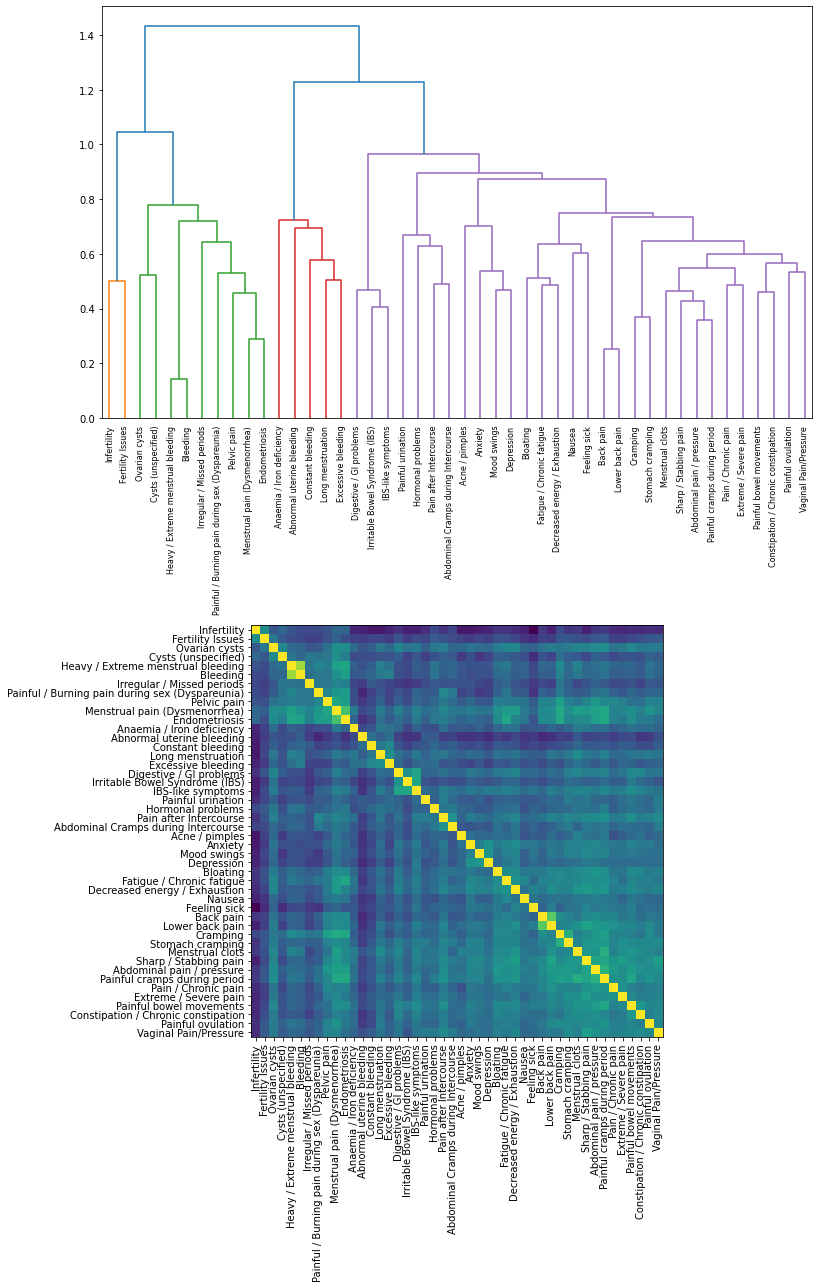

In [101]:

from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 18))
corr = spearmanr(X).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=feature_names, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.show()
#Total features categorises in 4 clusters.
#Anaemia is correlated to Abnormal bleeding and Long Mensturation and Excessive bleeding. 
#This cluster indirecty depend on the Infertility.
#Infertility is correlated to Ovarian Cysts, Heavy bleeding, pelvic pain, Dyspareunia and Endometriosis.


plt.figure(figsize=(12,5))
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=data.columns, orientation='top', 
           leaf_rotation=90);

In [143]:
#Create target Endometriosis
X_Endo=X.drop(['Endometriosis'], axis=1)
y_Endo = data["Endometriosis"]

In [144]:
#Create target Infertility
X_Inf=X.drop(['Infertility'], axis=1)
y_Inf = data["Infertility"]

In [145]:
#Create target Pelvic Pain
X_PPain=X.drop(['Pelvic pain'], axis=1)
y_PPain = data["Pelvic pain"]
X_PPain.shape, y_PPain.shape

((886, 45), (886,))

In [146]:
from sklearn.model_selection import train_test_split

X_Endo_train, X_Endo_test, y_Endo_train, y_Endo_test = train_test_split(X_Endo, y_Endo, test_size = 0.25, random_state = 0)
X_Inf_train, X_Inf_test, y_Inf_train, y_Inf_test = train_test_split(X_Inf, y_Inf, test_size = 0.25, random_state = 0)
X_PPain_train, X_PPain_test, y_PPain_train, y_PPain_test = train_test_split(X_PPain, y_PPain, test_size = 0.25, random_state = 0)


In [147]:
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

models=[LinearSVC(),
        SVC(kernel = 'rbf',random_state = 0),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        GaussianNB()]

model_names=['LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']


In [151]:
acc_Endo=[]
#d_Endo={}
for model in range(len(models)):
    clf=models[model]
    clf.fit(X_Endo_train,y_Endo_train)
    pred=clf.predict(X_Endo_test)
    acc_Endo.append(accuracy_score(pred,y_Endo_test))
     
#d_Endo={'Modelling Algo':model_names,'Accuracy':acc_Endo}
#acc_frame_Endo=pd.DataFrame(d_Endo)


In [163]:
acc_PPain=[]
#d_PPain={}
for model in range(len(models)):
    clf=models[model]
    clf.fit(X_PPain_train,y_PPain_train)
    pred=clf.predict(X_PPain_test)
    acc_PPain.append(accuracy_score(pred,y_PPain_test))
     

C:\Users\49163\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [162]:
acc_Inf=[]
d_Inf={}
for model in range(len(models)):
    clf=models[model]
    clf.fit(X_Inf_train,y_Inf_train)
    pred=clf.predict(X_Inf_test)
    acc_Inf.append(accuracy_score(pred,y_Inf_test))
     
 
d={'Modelling Algo':model_names,
       'Accuracy_Inf':acc_Inf,
       'Accuracy_Pelvic_Pain':acc_PPain,
       'Accuracy_Endometriosis':acc_Endo
      }
acc_frame=pd.DataFrame(d)
acc_frame

C:\Users\49163\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Modelling Algo,Accuracy_Inf,Accuracy_Pelvic_Pain,Accuracy_Endometriosis
0,LinearSVM,0.864865,0.846847,0.927928
1,rbfSVM,0.896396,0.837838,0.950450
2,KNearestNeighbors,0.873874,0.810811,0.923423
3,RandomForestClassifier,0.905405,0.828829,0.945946
4,DecisionTree,0.846847,0.774775,0.896396
5,GradientBoostingClassifier,0.900901,0.833333,0.936937
6,GaussianNB,0.666667,0.806306,0.914414


In [164]:
#Random Forest Classifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params_rf = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [1,2,3,4,5,10,20,50,100,200],
    'n_estimators': [1,3,5,10,25,30,50,100,200]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params_rf,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [165]:
grid_search.fit(X_Endo_train, y_Endo_train)
rf_best_Endo=grid_search.best_estimator_

Fitting 4 folds for each of 450 candidates, totalling 1800 fits


In [172]:
grid_search.fit(X_PPain_train, y_PPain_train)
rf_best_PPain=grid_search.best_estimator_

Fitting 4 folds for each of 450 candidates, totalling 1800 fits


In [173]:
grid_search.fit(X_Inf_train, y_Inf_train)
rf_best_Inf=grid_search.best_estimator_

Fitting 4 folds for each of 450 candidates, totalling 1800 fits


In [183]:
imp_df_Endo = pd.DataFrame({
    "Var-Endo": X_Endo_test.columns,
    "Imp-Endo": rf_best_Endo.feature_importances_,
})

imp_df_Endo.sort_values(by="Imp-Endo", ascending=False)

#Endometriosis is strongly associated with pelvic pain and Dyspareunia. 

,Var-Endo,Imp-Endo
1,Menstrual pain (Dysmenorrhea),0.121237
12,Painful cramps during period,0.098270
5,Cramping,0.079005
16,Fatigue / Chronic fatigue,0.077356
2,Painful / Burning pain during sex (Dyspareunia),0.069801
23,Bleeding,0.060289
0,Heavy / Extreme menstrual bleeding,0.052444
3,Pelvic pain,0.048130
6,Abdominal pain / pressure,0.037953
4,Irregular / Missed periods,0.029677


In [184]:
imp_df_PPain = pd.DataFrame({
    "Var-PPain": X_PPain_test.columns,
    "Imp-PPain": rf_best_PPain.feature_importances_,
})

imp_df_PPain.sort_values(by="Imp-PPain", ascending=False)

# significant correlation between chronic pelvic pain and Endometriosis

#sexual pain (deep dyspareunia) was found to be associated with musculoskeletal pain contributors (abdominal wall pain and pelvic floor tenderness)

,Var-PPain,Imp-PPain
1,Menstrual pain (Dysmenorrhea),0.135328
44,Endometriosis,0.121437
4,Cramping,0.096234
5,Abdominal pain / pressure,0.080891
16,Painful ovulation,0.050014
33,Vaginal Pain/Pressure,0.043307
11,Painful cramps during period,0.040689
6,Back pain,0.040442
34,Sharp / Stabbing pain,0.038322
2,Painful / Burning pain during sex (Dyspareunia),0.033809


In [185]:
imp_df_Inf = pd.DataFrame({
    "Var-Inf": X_Inf_test.columns,
    "Imp-Inf": rf_best_Inf.feature_importances_,
})

imp_df_Inf.sort_values(by="Imp-Inf", ascending=False)

#Infertility is associated with Endometriosis and chronic pain and Cysts and Heavy bleeding

,Var-Inf,Imp-Inf
24,Fertility Issues,0.229704
36,Cysts (unspecified),0.056380
1,Menstrual pain (Dysmenorrhea),0.047609
44,Endometriosis,0.044955
25,Ovarian cysts,0.033383
38,Hormonal problems,0.028987
0,Heavy / Extreme menstrual bleeding,0.027742
12,Pain / Chronic pain,0.022690
42,Abdominal Cramps during Intercourse,0.022518
16,Painful ovulation,0.021707
